### Data Prepare (Metric, Config)

In [1]:
import pandas as pd

ex_metrics = pd.read_csv("/home/sein/mk_config/RocksDB/metrics/external/external_results_2.csv")

ex_metrics = ex_metrics.drop(['index'], axis = 1)
# ex_metrics = ex_metrics.round(3)
ex_metrics

,TIME,RATE,WAF,SA
0,4.4,23.31,6.0,70.49
1,4.9,21.01,7.3,53.92
2,12.1,8.45,6.7,31.45
3,19.7,5.20,8.5,53.40
4,6.0,17.16,7.1,97.80
...,...,...,...,...
19995,24.7,4.14,6.9,77.43
19996,5.6,18.16,5.9,72.38
19997,4.7,21.87,6.7,97.70
19998,7.2,14.13,6.7,80.17


In [2]:
import random
import glob
import os
import sys
import pandas as pd

# knob_list = glob.glob("/home/sein/mk_config/RocksDB/configs/config*.cnf")

cnt = 0

for xx in range(1,20001):

    path = "/home/sein/mk_config/RocksDB/configs/config{}.cnf".format(xx)
    a_all = pd.read_csv(path, sep="=", names=['Sample', 'value'])
    
    a_all = a_all.set_index("Sample")
    cur_all_df = a_all.T
    
    if cnt == 0:
        A_config = cur_all_df
    else :
        A_config = pd.concat([A_config, cur_all_df], axis=0)
    cnt += 1
A_config = A_config.reset_index()
A_config = A_config.drop(["index"],axis=1)
A_config = A_config.drop(["[rocksdb]"],axis=1)

# A_config = A_config.drop(A_config.columns[[0,1]], axis=1)


A_config

Sample,max_background_compactions,max_background_flushes,write_buffer_size,max_write_buffer_number,min_write_buffer_number_to_merge,compaction_pri,compaction_style,level0_file_num_compaction_trigger,level0_slowdown_writes_trigger,level0_stop_writes_trigger,...,open_files,block_size,cache_index_and_filter_blocks,max_bytes_for_level_base,max_bytes_for_level_multiplier,target_file_size_base,target_file_size_multiplier,num_levels,memtable_bloom_size_ratio,compression_ratio
0,6,16,1304576,3,2,1,0,3,24,44,...,10000,9216,false,5242880,11,1800192,1,8,0.1,0.67
1,2,14,911360,6,2,0,0,7,18,55,...,100000,15360,true,3145728,10,1729536,1,5,0.15,0.5
2,8,6,1474560,6,1,2,0,5,18,48,...,1000000,6144,false,4194304,9,1429504,1,6,0.05,0.36
3,12,8,550912,7,1,3,0,4,18,35,...,10000,3072,true,2097152,11,900096,1,7,0.05,0.63
4,11,15,1426432,5,1,0,0,5,23,59,...,10000,5120,false,5242880,8,560128,1,5,0.2,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,15,551936,5,1,3,0,4,18,56,...,10000,8192,true,3145728,8,1148928,1,5,0.2,0.93
19996,7,8,826368,4,2,2,0,7,18,56,...,1000000,13312,true,7340032,10,922624,2,6,0.05,0.68
19997,6,12,730112,5,2,1,0,7,29,36,...,100000,8192,true,4194304,9,1661952,1,6,0,0.21
19998,9,11,1430528,6,1,3,0,4,25,34,...,100000,13312,true,3145728,9,834560,2,7,0,0.77


In [3]:
# A_config = A_config.drop(["[rocksdb]"],axis=1)
# A_config = A_config.drop(['compaction_style'], axis = 1)


A_config.columns = A_config.columns.str.strip()
# A_config = A_config.drop(['compaction_style'], axis = 1)

# # A_config.columns
A_config

Sample,max_background_compactions,max_background_flushes,write_buffer_size,max_write_buffer_number,min_write_buffer_number_to_merge,compaction_pri,compaction_style,level0_file_num_compaction_trigger,level0_slowdown_writes_trigger,level0_stop_writes_trigger,...,open_files,block_size,cache_index_and_filter_blocks,max_bytes_for_level_base,max_bytes_for_level_multiplier,target_file_size_base,target_file_size_multiplier,num_levels,memtable_bloom_size_ratio,compression_ratio
0,6,16,1304576,3,2,1,0,3,24,44,...,10000,9216,false,5242880,11,1800192,1,8,0.1,0.67
1,2,14,911360,6,2,0,0,7,18,55,...,100000,15360,true,3145728,10,1729536,1,5,0.15,0.5
2,8,6,1474560,6,1,2,0,5,18,48,...,1000000,6144,false,4194304,9,1429504,1,6,0.05,0.36
3,12,8,550912,7,1,3,0,4,18,35,...,10000,3072,true,2097152,11,900096,1,7,0.05,0.63
4,11,15,1426432,5,1,0,0,5,23,59,...,10000,5120,false,5242880,8,560128,1,5,0.2,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,15,551936,5,1,3,0,4,18,56,...,10000,8192,true,3145728,8,1148928,1,5,0.2,0.93
19996,7,8,826368,4,2,2,0,7,18,56,...,1000000,13312,true,7340032,10,922624,2,6,0.05,0.68
19997,6,12,730112,5,2,1,0,7,29,36,...,100000,8192,true,4194304,9,1661952,1,6,0,0.21
19998,9,11,1430528,6,1,3,0,4,25,34,...,100000,13312,true,3145728,9,834560,2,7,0,0.77


In [4]:
for i in range (len(A_config)):
    if A_config['cache_index_and_filter_blocks'][i] == ' false':
       A_config['cache_index_and_filter_blocks'][i] = 0
        
    else:
        A_config['cache_index_and_filter_blocks'][i] = 1     
    
    

In [5]:
#### compression type = [' snappy', ' zlib', ' none', ' lz4' ]

for i in range (len(A_config)):
    if A_config['compression_type'][i] == ' snappy':
        A_config['compression_type'][i] = 0
        
    elif A_config['compression_type'][i] == ' zlib':
        A_config['compression_type'][i] = 1    
        
    elif A_config['compression_type'][i] == ' none' :
        A_config['compression_type'][i] = 2
    else:
        A_config['compression_type'][i] = 3
            
    

### Data Prepare (Config)

- all_samples = config + internal_metrics

In [6]:
all_samples = pd.concat([A_config, ex_metrics], axis=1)
all_samples

,max_background_compactions,max_background_flushes,write_buffer_size,max_write_buffer_number,min_write_buffer_number_to_merge,compaction_pri,compaction_style,level0_file_num_compaction_trigger,level0_slowdown_writes_trigger,level0_stop_writes_trigger,...,max_bytes_for_level_multiplier,target_file_size_base,target_file_size_multiplier,num_levels,memtable_bloom_size_ratio,compression_ratio,TIME,RATE,WAF,SA
0,6,16,1304576,3,2,1,0,3,24,44,...,11,1800192,1,8,0.1,0.67,4.4,23.31,6.0,70.49
1,2,14,911360,6,2,0,0,7,18,55,...,10,1729536,1,5,0.15,0.5,4.9,21.01,7.3,53.92
2,8,6,1474560,6,1,2,0,5,18,48,...,9,1429504,1,6,0.05,0.36,12.1,8.45,6.7,31.45
3,12,8,550912,7,1,3,0,4,18,35,...,11,900096,1,7,0.05,0.63,19.7,5.20,8.5,53.40
4,11,15,1426432,5,1,0,0,5,23,59,...,8,560128,1,5,0.2,0.09,6.0,17.16,7.1,97.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,15,551936,5,1,3,0,4,18,56,...,8,1148928,1,5,0.2,0.93,24.7,4.14,6.9,77.43
19996,7,8,826368,4,2,2,0,7,18,56,...,10,922624,2,6,0.05,0.68,5.6,18.16,5.9,72.38
19997,6,12,730112,5,2,1,0,7,29,36,...,9,1661952,1,6,0,0.21,4.7,21.87,6.7,97.70
19998,9,11,1430528,6,1,3,0,4,25,34,...,9,834560,2,7,0,0.77,7.2,14.13,6.7,80.17


### AutoEncoder (raw data + new data)

In [ ]:
## 원본
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader

# samples = pd.concat([configs,metrics], axis=1)
scaler = MinMaxScaler()
scaled_samples = scaler.fit_transform(all_samples)

X_train, X_test = train_test_split(scaled_samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=516, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=516, shuffle=True)


In [7]:
## 1. config, metrics 따로 minmax
## config+internal 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader
import numpy as np

# samples = pd.concat([configs,metrics], axis=1)
scaler_conf = MinMaxScaler()
scaler_metric = MinMaxScaler()
scaled_configs = scaler_conf.fit_transform(A_config)
scaled_metrics = scaler_metric.fit_transform(ex_metrics)

scaled_samples = np.concatenate([scaled_configs,scaled_metrics], axis=1)

X_train, X_test = train_test_split(scaled_samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=516, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=516, shuffle=True)


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
### 원본

import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(26,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16,16),
        # nn.Dropout(p=0.2),
        # nn.BatchNorm1d(16),
        
        # nn.ReLU(),
        # nn.Linear(16,8),
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(

        # nn.Linear(8,16),
        # nn.BatchNorm1d(16),
        # nn.ReLU(),
        nn.Linear(16,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16, 26), 
        nn.Sigmoid()
    )
  
  #인코더와 디코더 연산을 차례대로 수행하도록 설정 
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [9]:
# from torch import device
from torch import optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model =Autoencoder().to(device)
model = Autoencoder().to(device)
# model = Autoencoder()


critertion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
#lr=1e-4
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trainloss = []
validationloss = []
epoch_list = []

for epoch in range(8000):
  running_loss = 0
  model.train()
  
  for data in trainloader:
    inputs = data[0].float().to(device)
    optimizer.zero_grad()
    outputs = model(inputs) 
    loss = critertion(inputs, outputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  trainloss.append(train_loss)
  # epoch_list.append(epoch)
  
  if epoch % 300 == 0:
    total_val_loss = 0
    model.eval()
    with torch.no_grad():
      running_loss = 0
      
      for data in testloader:
        inputs = data[0].float().to(device)
        # optimizer.zero_grad()
        outputs = model(inputs) 
        loss = critertion(inputs, outputs)
        running_loss += loss.item()
        inputs_np = inputs.cpu().detach().numpy()
        outputs_np = outputs.cpu().detach().numpy()
      total_val_loss = running_loss / len(testloader)
      validationloss.append(total_val_loss)
        
    print('[%d] tr_loss : %.3f | val_loss : %.3f' %(epoch +1, train_loss, total_val_loss))
    # print('MSE_Loss :', critertion(inputs, outputs) )

[1] tr_loss : 0.134 | val_loss : 0.132
[301] tr_loss : 0.036 | val_loss : 0.035
[601] tr_loss : 0.029 | val_loss : 0.028
[901] tr_loss : 0.026 | val_loss : 0.026
[1201] tr_loss : 0.026 | val_loss : 0.026
[1501] tr_loss : 0.025 | val_loss : 0.026
[1801] tr_loss : 0.024 | val_loss : 0.023
[2101] tr_loss : 0.022 | val_loss : 0.022
[2401] tr_loss : 0.023 | val_loss : 0.021
[2701] tr_loss : 0.022 | val_loss : 0.022
[3001] tr_loss : 0.021 | val_loss : 0.021
[3301] tr_loss : 0.022 | val_loss : 0.021
[3601] tr_loss : 0.021 | val_loss : 0.021
[3901] tr_loss : 0.021 | val_loss : 0.022
[4201] tr_loss : 0.023 | val_loss : 0.021
[4501] tr_loss : 0.021 | val_loss : 0.021
[4801] tr_loss : 0.020 | val_loss : 0.020
[5101] tr_loss : 0.022 | val_loss : 0.021
[5401] tr_loss : 0.021 | val_loss : 0.021
[5701] tr_loss : 0.021 | val_loss : 0.020
[6001] tr_loss : 0.021 | val_loss : 0.020
[6301] tr_loss : 0.020 | val_loss : 0.020
[6601] tr_loss : 0.020 | val_loss : 0.020
[6901] tr_loss : 0.020 | val_loss : 0.02

### AutoEncoder T-SNE (Reconstruction이 잘 되었는지 확인)

In [10]:
label_total = torch.tensor(X_test)
recon_total = model(torch.tensor(X_test).to("cuda").float())

label_total_np = label_total.detach().cpu().numpy()
recon_total_np = recon_total.detach().cpu().numpy()

all_concat = np.concatenate([label_total_np,recon_total_np] )
all_concat.shape

(8000, 26)

In [11]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler,StandardScaler


n_components = 2

scaler = MinMaxScaler()
input_array = scaler.fit_transform(inputs_np)


tsne_model = TSNE(n_components=n_components)

r = tsne_model.fit_transform(all_concat)

# print(tsne_model.fit_transform(input_array))

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [12]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.datasets import load_digit
import torch


n_components = 2

tsne_model = TSNE(n_components=n_components)

# r2 = tsne_model.fit_transform(torch.tensor(synthetic_data).cpu())
#scaler = MinMaxScaler()
#output_array = scaler.fit_transform(outputs_np)
r2 = tsne_model.fit_transform(recon_total_np)

 
# print(tsne_model.fit_transform(input_array))

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


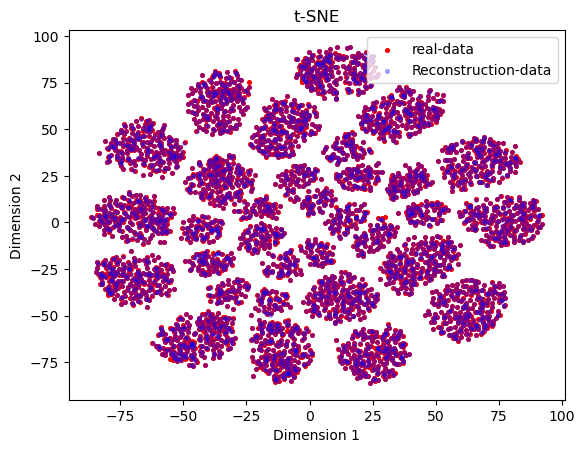

<Figure size 1000x1000 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

# t-SNE 결과 시각화
plt.scatter(r[:4000, 0], r[:4000, 1], s=7, color='red',  label='real-data')
plt.scatter(r[4000:, 0], r[4000:, 1], s=7, alpha=0.3, color='blue', label='Reconstruction-data')

plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.legend(loc='upper right')
plt.figure(figsize=(10,10))
plt.show()


In [14]:
label_total_np[:3]
np.round(label_total_np[:3], 3)

array([[0.667, 0.   , 0.901, 0.5  , 0.   , 1.   , 0.   , 0.5  , 0.625,
        0.875, 0.667, 1.   , 0.1  , 0.786, 1.   , 0.833, 0.5  , 0.284,
        0.   , 1.   , 0.75 , 0.111, 0.122, 0.311, 0.167, 0.991],
       [0.   , 0.067, 0.975, 0.   , 0.   , 0.333, 0.   , 0.667, 0.188,
        0.344, 0.667, 1.   , 0.01 , 0.214, 0.   , 0.667, 0.75 , 0.303,
        0.   , 0.333, 0.5  , 0.758, 0.224, 0.177, 0.111, 0.991],
       [0.2  , 0.067, 0.68 , 0.   , 0.   , 0.333, 0.   , 0.667, 0.125,
        0.094, 0.667, 0.   , 0.01 , 0.571, 1.   , 0.   , 0.5  , 0.379,
        1.   , 0.667, 0.5  , 0.566, 0.163, 0.243, 0.296, 0.99 ]])

In [15]:
np.round(recon_total_np[:3], 3)

array([[0.688, 0.484, 0.663, 0.672, 0.041, 0.916, 0.   , 0.495, 0.624,
        0.535, 0.823, 0.976, 0.008, 0.84 , 0.77 , 0.897, 0.55 , 0.466,
        0.122, 0.951, 0.822, 0.316, 0.128, 0.322, 0.203, 0.745],
       [0.089, 0.447, 0.58 , 0.113, 0.044, 0.252, 0.   , 0.785, 0.185,
        0.385, 0.712, 0.977, 0.   , 0.172, 0.   , 0.759, 0.832, 0.373,
        0.022, 0.392, 0.527, 0.757, 0.271, 0.162, 0.177, 0.946],
       [0.233, 0.428, 0.501, 0.096, 0.008, 0.283, 0.   , 0.822, 0.242,
        0.404, 0.774, 0.   , 0.   , 0.368, 0.921, 0.087, 0.571, 0.49 ,
        1.   , 0.837, 0.528, 0.621, 0.242, 0.195, 0.246, 0.898]],
      dtype=float32)

### Optimization in latent space (TabNet)
- Prediction

In [16]:

import torch
import pandas as pd
import numpy as np

ex_scaled_new_Samples = torch.Tensor(scaled_samples).to(device)

with torch.no_grad():
    encoded_vector_BO = model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

BO'S Encoded Latent Vector: tensor([[0.4908, 0.4092, 0.5081,  ..., 0.5269, 0.0784, 0.4411],
        [0.4510, 0.5472, 0.4623,  ..., 0.4355, 0.0849, 0.4223],
        [0.5252, 0.3625, 0.5148,  ..., 0.4757, 0.1068, 0.5042],
        ...,
        [0.4941, 0.5188, 0.4466,  ..., 0.5096, 0.0858, 0.4922],
        [0.5669, 0.5935, 0.4351,  ..., 0.4483, 0.1089, 0.5312],
        [0.4681, 0.6258, 0.5344,  ..., 0.4462, 0.1368, 0.5797]],
       device='cuda:0')


In [13]:
# WAF, RATE
# WAF, TIME
ex_metrics_r = ex_metrics['RATE']
ex_metrics_w = ex_metrics['WAF']
ex_metrics_t = ex_metrics['TIME']
ex_metrics_s = ex_metrics['SA']

ex_metrics_p = pd.concat([ex_metrics_r, ex_metrics_w], axis=1)
ex_metrics_pp = pd.concat([ex_metrics_w, ex_metrics_t], axis=1)
ex_metrics_ppp = pd.concat([ex_metrics_t, ex_metrics_s], axis=1)

In [17]:
### TabNet
### X = encoded_vector_BO (Scaling O) , Y = metrics (Scaling X)
# scaler = MinMaxScaler()
# scaled_configs = scaler.fit_transform(configs)
# scaled_metrics = scaler.fit_transform(metrics.values.reshape(-1,1))
from sklearn.metrics import r2_score
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_latent = np.array(encoded_vector_BO.cpu().numpy())
Y_latent = np.array(ex_metrics)
# Y_latent = scaled_metrics

lt_X_train, lt_X_test, lt_y_train, lt_y_test = train_test_split(X_latent,Y_latent,test_size=0.2, shuffle=True)


Y_scaler = MinMaxScaler().fit(lt_y_train)
scaled_lt_y_train = Y_scaler.transform(lt_y_train)
scaled_lt_y_test = Y_scaler.transform(lt_y_test)


# Tabnet 모델 생성
lt_regressor = TabNetRegressor(output_dim=4, verbose = 10,seed = 2024, optimizer_fn=torch.optim.AdamW) 
    
# 모델 학습
lt_regressor.fit(X_train=lt_X_train, y_train=scaled_lt_y_train,
              eval_set=[(lt_X_test, scaled_lt_y_test)],
              patience=500, 
              batch_size = 516,
              max_epochs=10000,
              eval_metric=['mse'])

# 테스트 데이터로 예측
lt_predictions = lt_regressor.predict(lt_X_test)

# 성능 평가
print('BEST VALID SCORE : ', lt_regressor.best_cost)
print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions))





/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.34654 | val_0_mse: 0.0645  |  0:00:00s
epoch 10 | loss: 0.01177 | val_0_mse: 0.04293 |  0:00:08s
epoch 20 | loss: 0.00966 | val_0_mse: 0.01172 |  0:00:16s
epoch 30 | loss: 0.00725 | val_0_mse: 0.00653 |  0:00:23s
epoch 40 | loss: 0.00638 | val_0_mse: 0.00543 |  0:00:31s
epoch 50 | loss: 0.0056  | val_0_mse: 0.00567 |  0:00:38s
epoch 60 | loss: 0.00507 | val_0_mse: 0.00535 |  0:00:46s
epoch 70 | loss: 0.00489 | val_0_mse: 0.00405 |  0:00:54s
epoch 80 | loss: 0.00467 | val_0_mse: 0.00428 |  0:01:02s
epoch 90 | loss: 0.00444 | val_0_mse: 0.00471 |  0:01:11s
epoch 100| loss: 0.00413 | val_0_mse: 0.00415 |  0:01:20s
epoch 110| loss: 0.00452 | val_0_mse: 0.00367 |  0:01:30s
epoch 120| loss: 0.00417 | val_0_mse: 0.00392 |  0:01:40s
epoch 130| loss: 0.00389 | val_0_mse: 0.0034  |  0:01:50s
epoch 140| loss: 0.00397 | val_0_mse: 0.00679 |  0:01:59s
epoch 150| loss: 0.00365 | val_0_mse: 0.00464 |  0:02:09s
epoch 160| loss: 0.0035  | val_0_mse: 0.00403 |  0:02:19s
epoch 170| los

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


BEST VALID SCORE :  0.002678142788024552
R2 SCORE :  0.8949296247800275


In [18]:
print(r2_score(scaled_lt_y_test[:,0], lt_predictions[:,0]))
print(r2_score(scaled_lt_y_test[:,1], lt_predictions[:,1]))
print(r2_score(scaled_lt_y_test[:,2], lt_predictions[:,2]))
print(r2_score(scaled_lt_y_test[:,3], lt_predictions[:,3]))

0.9074949872016702
0.8572559557341335
0.8240662577792521
0.9909012984050521


In [22]:
saving_path_name = "/home/sein/mk_config/240319_fighting/tabnet_model_wk2"
saved_filepath = lt_regressor.save_model(saving_path_name)


# regressor.load_model(saving_path_name)

Successfully saved model at /home/sein/mk_config/240319_fighting/tabnet_model_wk2.zip


In [23]:
model_path = '/home/sein/mk_config/240319_fighting/autoencoder_wk2.pt'
torch.save(model.state_dict(), model_path)
# fuck_model = Autoencoder().to('cuda')
# load_weight = torch.load(model_path)
# fuck_model.load_state_dict(load_weight)

# with torch.no_grad():
#     fuck_model.eval()
#     fuck_model.decoder(ex_data.to('cuda'))

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_lt_y_test, lt_predictions, color='blue', alpha=0.3, s=3)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.title('Scatter Plot of Real Data vs. Predicted Data')
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(scaled_lt_y_test.reshape(-1,1).squeeze(),label='Test Data', color='lightskyblue')
sns.kdeplot(lt_predictions.reshape(-1,1).squeeze(), label='Prediction Data', color='palevioletred')
plt.legend(loc='upper right')

In [19]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T
# latent_pd_T.index

In [36]:
### BO 코드
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, regressor):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        # self.metrics0 = metrics0
        # self.metrics1 = metrics1
        # self.metrics2 = metrics2
        # self.metrics3 = metrics3
        self.regressor = regressor
        # self.config_info_path = config_info_path
        # self.min_max_same_knobs = []
        
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        KB = 1024
        MB = 1024 * 1024
        self.option = {
        "max_background_compactions": [i for i in range(1, 17)], # D:1, B:4 ~ 32
        "max_background_flushes": [i for i in range(1, 17)], #D:1, B:4~32
        "write_buffer_size": [s * KB for s in range(512, 2048)], #D:64M, B:0.25M ~ 1M
        "max_write_buffer_number": [i for i in range(2, 9)], #D:2, B:2~16
        "min_write_buffer_number_to_merge": [i for i in range(1, 3)], #D:1
        "compaction_pri": { #D:0
            "kByCompensatedSize" : 0,
            "kOldestLargestSeqFirst" : 1,
            "kOldestSmallestSeqFirst" : 2,
            "kMinOverlappingRatio" : 3
        },
        "compaction_style": { #D:0
            "kCompactionStyleLevel" : 0, 
            "kCompactionStyleUniversal" : 1,
            "kCompactionStyleFIFO" : 2,
            "kCompactionStyleNone" : 3
        },
        "level0_file_num_compaction_trigger": [i for i in range(2, 9)], #D:4, B:2 ~ 8
        "level0_slowdown_writes_trigger": [i for i in range(16, 33)], #D:20, B:16 ~ 64
        "level0_stop_writes_trigger": [i for i in range(32, 65)], #D:36, B:64 ~ 128
        "compression_type": {
            "snappy" : 0,
            "zlib" : 1,
            "lz4" : 2,
            "none" : 3}, #D:"snappy", B:no "bzip2"
        "bloom_locality": [0, 1], #D:0
        "open_files": [-1, 10000, 100000, 1000000], #D:-1 B:-1
        "block_size": [s * KB for s in range(2, 17)], #D:4096, B:4096 ~ 32768
        "cache_index_and_filter_blocks": 
            {"true" : 1, 
             "false" : 0
             },#D:false
        "memtable_bloom_size_ratio": [0, 0.05, 0.1, 0.15, 0.2], #D:0
        "compression_ratio": [i/100 for i in range(100)], #D:0.5, B:0.1 ~ 0.9
        "max_bytes_for_level_base": [s * MB for s in range(2, 9)], #D:256M, B:1M ~ 16M
        "max_bytes_for_level_multiplier": [i for i in range(8, 13)], #D:10, B:6 ~ 10
        "target_file_size_base": [s * KB for s in range(512, 2049)], #D:64M, B:0.25M ~ 4M
        "target_file_size_multiplier": [ i for i in range(1, 3)], #D:1, B:1 ~ 2
        "num_levels": [5, 6, 7, 8] #D:7, B:7
    }

   
    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            self.pbounds[str(v)] = (0, 1)
                        
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        # scaled_X = self.X_scaler.transform([x])
        x = x.reshape(1, -1)

        res = self.regressor.predict(x)
        
        target_res0 = -res[:,0]
        target_res1 = res[:,1]
        target_res2 = -res[:,2]
        target_res3 = -res[:,3]
        
        
        weights = [0.25, 0.25, 0.25, 0.25]  # 가중치 설정
        target_value = np.sum([target_res0, target_res1, target_res2, target_res3] * np.array(weights))

        
        return target_value
        # return target_value.squeeze()
    
        # return res
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2024)

        self.acquisition_function = UtilityFunction(kind="ei", kappa=0.0, xi=0.001)
        
        self.optimizer.maximize(n_iter=self.iteration, init_points=40, acquisition_function=self.acquisition_function)
    

### K-FOLD 추가

### Bayesian Optimization

In [37]:
tuner1 = BO(iteration=300, 
           configs=encoded_vector_BO.cpu().numpy(),
           metrics=ex_metrics,
           regressor=lt_regressor
           )
# tuner1.train_regression_model()
tuner1.tune()
# tuner1.plot_history()

|   iter    |  target   |     0     |     1     |    10     |    11     |    12     |    13     |    14     |    15     |     2     |     3     |     4     |     5     |     6     |     7     |     8     |     9     |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | -4.006    | 0.588     | 0.6991    | 0.1882    | 0.04381   | 0.205     | 0.1061    | 0.7272    | 0.6794    | 0.4738    | 0.4483    | 0.01911   | 0.7526    | 0.6024    | 0.9618    | 0.6644    | 0.6066    |
| 2         | -8.342    | 0.4492    | 0.2254    | 0.6702    | 0.7358    | 0.258     | 0.09554   | 0.9609    | 0.2518    | 0.2822    | 0.7683    | 0.7979    | 0.544     | 0.3827    | 0.3817    | 0.2858    | 0.7403    |
| 3         | -1.463    | 0.239     | 0.4377    | 0.8835    | 0.2893    | 0.7845    | 0.759     | 0.4178    | 0.2258    | 0.4201

In [28]:
ex_data = [0.6014    , 0.2781    , 0.647     , 0.0       , 1.0       , 0.636     , 0.01406   , 0.363     , 0.9626    , 0.0       , 0.0       , 1.0       , 0.8876    , 0.2794    , 0.4419    , 0.6996    , ]

In [38]:
ex_data = [ 0.0       , 0.01538   , 0.9561    , 0.5904    , 1.0       , 0.9981    , 0.0       , 0.4547    , 0.2029    , 0.3595    , 0.8058    , 0.9607    , 0.9904    , 0.07382   , 0.8923    , 0.9446    ]

In [26]:
len(ex_data)

8

In [39]:
# Decoding to real dimension

ex_data = torch.tensor(ex_data).unsqueeze(0)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    model.eval()
    decode_value = model.decoder(ex_data)
    print("Decoded Value:", decode_value)

Decoded Value: tensor([[9.2273e-01, 3.4532e-02, 1.0747e-06, 9.9915e-01, 0.0000e+00, 9.9935e-01,
         1.1706e-17, 9.9999e-01, 6.4241e-01, 2.2623e-04, 2.8680e-01, 0.0000e+00,
         9.9972e-01, 2.4529e-08, 3.7511e-10, 9.9908e-01, 9.7437e-01, 9.9810e-01,
         9.4120e-20, 9.9974e-01, 9.9873e-01, 1.2896e-04, 2.3268e-04, 9.8936e-01,
         8.3779e-01, 2.7250e-04]], device='cuda:0')


In [28]:
len(decode_value)

26

In [40]:
converted_values = [float(value) for value in decode_value[0]]


In [41]:
converted_values

[0.9227312803268433,
 0.034531980752944946,
 1.0746771295089275e-06,
 0.9991503953933716,
 0.0,
 0.9993512034416199,
 1.170558670383183e-17,
 0.9999942779541016,
 0.6424083709716797,
 0.00022622979304287583,
 0.2868032455444336,
 0.0,
 0.9997163414955139,
 2.4529395403760645e-08,
 3.7510700101606176e-10,
 0.999075174331665,
 0.9743654131889343,
 0.9981009364128113,
 9.412046165601069e-20,
 0.9997387528419495,
 0.9987319111824036,
 0.000128963467432186,
 0.0002326821704627946,
 0.9893589019775391,
 0.8377948999404907,
 0.00027250382117927074]

In [42]:
df_converted_values = pd.DataFrame(converted_values)

real_bo_config = df_converted_values[:22] 
real_v = np.array(real_bo_config)

rescaled_bo_config = scaler_conf.inverse_transform(real_v.reshape(1,-1))

# rescaled_bo_config = scaler.inverse_transform(real_v)




In [43]:
rescaled_bo_config

array([[1.48409692e+01, 1.51797971e+00, 5.24289689e+05, 7.99490237e+00,
        1.00000000e+00, 2.99805361e+00, 1.17055867e-17, 7.99996567e+00,
        2.62785339e+01, 3.20072394e+01, 8.60409737e-01, 0.00000000e+00,
        9.99716341e+05, 2.04800035e+03, 3.75107001e-10, 8.38278950e+06,
        1.18974617e+01, 2.09416503e+06, 1.00000000e+00, 7.99921626e+00,
        1.99746382e-01, 1.27673833e-04]])

In [44]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_bo_config)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,14.840969205,1.517979711,524289.689220499,7.994902372,1.000000000,2.998053610,0.000000000,7.999965668,26.278533936,32.007239353,...,999716.341211855,2048.000351653,0.000000000,8382789.500000000,11.897461653,2094165.031250000,1.000000000,7.999216259,0.199746382,0.000127674


In [45]:
for i in range (len(A_config.columns)):
    print('"{}" : {},'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

"max_background_compactions" : 15,
"max_background_flushes" : 2,
"write_buffer_size" : 524290,
"max_write_buffer_number" : 8,
"min_write_buffer_number_to_merge" : 1,
"compaction_pri" : 3,
"compaction_style" : 0,
"level0_file_num_compaction_trigger" : 8,
"level0_slowdown_writes_trigger" : 26,
"level0_stop_writes_trigger" : 32,
"compression_type" : 1,
"bloom_locality" : 0,
"open_files" : 999716,
"block_size" : 2048,
"cache_index_and_filter_blocks" : 0,
"max_bytes_for_level_base" : 8382790,
"max_bytes_for_level_multiplier" : 12,
"target_file_size_base" : 2094165,
"target_file_size_multiplier" : 1,
"num_levels" : 8,
"memtable_bloom_size_ratio" : 0,
"compression_ratio" : 0,


In [47]:
# 결과를 저장할 파일 경로 설정
file_path = '/home/sein/mk_config/240319_RocksDB_OURS_config/WK2_2.txt'

# 파일 열기
with open(file_path, 'w') as file:
    # 각 열의 이름과 결과를 파일에 쓰기
    for i in range(len(A_config.columns)):
        file.write('{} = {}\n'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))



### Model Load

In [9]:
model_path = '/home/sein/mk_config/240319_fighting/autoencoder_wk2.pt'
    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model =Autoencoder().to(device)
test0_model = Autoencoder().to(device)
load_weight = torch.load(model_path)
test0_model.load_state_dict(load_weight)

ex_scaled_new_Samples = torch.Tensor(scaled_samples).to(device)

with torch.no_grad():
    encoded_vector_BO = test0_model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

BO'S Encoded Latent Vector: tensor([[0.4908, 0.4092, 0.5081,  ..., 0.5269, 0.0784, 0.4411],
        [0.4510, 0.5472, 0.4623,  ..., 0.4355, 0.0849, 0.4223],
        [0.5252, 0.3625, 0.5148,  ..., 0.4757, 0.1068, 0.5042],
        ...,
        [0.4941, 0.5188, 0.4466,  ..., 0.5096, 0.0858, 0.4922],
        [0.5669, 0.5935, 0.4351,  ..., 0.4483, 0.1089, 0.5312],
        [0.4681, 0.6258, 0.5344,  ..., 0.4462, 0.1368, 0.5797]],
       device='cuda:0')


In [10]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import r2_score


saving_path_name = "/home/sein/mk_config/240319_fighting/tabnet_model_wk2.zip"
# saved_filepath = lt_regressor.save_model(saving_path_name)

test_regressor = TabNetRegressor(output_dim=4,verbose = 10,seed = 2024, optimizer_fn=torch.optim.AdamW) 
test_regressor.load_model(saving_path_name)

X_latent = np.array(encoded_vector_BO.cpu().numpy())
Y_latent = np.array(ex_metrics)
# Y_latent = scaled_metrics

lt_X_train, lt_X_test, lt_y_train, lt_y_test = train_test_split(X_latent,Y_latent,test_size=0.2, shuffle=True)


Y_scaler = MinMaxScaler().fit(lt_y_train)
scaled_lt_y_train = Y_scaler.transform(lt_y_train)
scaled_lt_y_test = Y_scaler.transform(lt_y_test)

# 테스트 데이터로 예측
test_predictions = test_regressor.predict(lt_X_test)

# 성능 평가
# print('BEST VALID SCORE : ', lt_regressor.best_cost)
print('R2 SCORE : ' , r2_score(scaled_lt_y_test, test_predictions))


R2 SCORE :  0.8913810558325233


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [11]:
print(r2_score(scaled_lt_y_test[:,0], test_predictions[:,0]))
print(r2_score(scaled_lt_y_test[:,1], test_predictions[:,1]))
print(r2_score(scaled_lt_y_test[:,2], test_predictions[:,2]))
print(r2_score(scaled_lt_y_test[:,3], test_predictions[:,3]))

0.900946642249651
0.8577635705100433
0.8170419099326278
0.9897721006377708


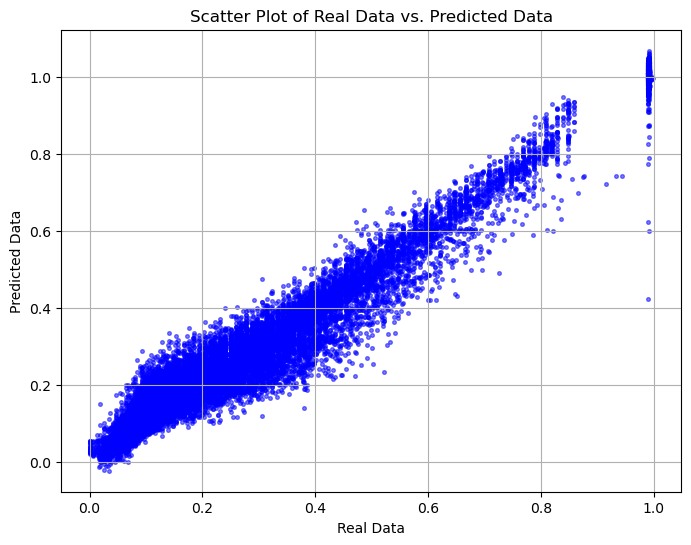

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(scaled_lt_y_test, test_predictions , color='blue', alpha=0.5, s=7)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.title('Scatter Plot of Real Data vs. Predicted Data')
plt.grid(True)
plt.show()

In [14]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T
# latent_pd_T.index

In [25]:
### BO 코드
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, regressor):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        # self.metrics0 = metrics0
        # self.metrics1 = metrics1
        # self.metrics2 = metrics2
        # self.metrics3 = metrics3
        self.regressor = regressor
        # self.config_info_path = config_info_path
        # self.min_max_same_knobs = []
        self._init_pbounds()
    
   
    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            self.pbounds[str(v)] = (0, 1)
            
            
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        # scaled_X = self.X_scaler.transform([x])
        x = x.reshape(1, -1)
        res = self.regressor.predict(x)
        
        target_res0 = res[:,0]  #TIME
        target_res1 = res[:,1]  #RATE
        target_res2 = res[:,2]  #WAF
        target_res3 = res[:,3]  #SA
        
        target_0 = 104.9 / target_res0
        target_1 = target_res1 / 8.92
        target_2 = 10.4 / target_res2
        target_3 = 354.46 / target_res3
        
        
        weights = [0.25, 0.25, 0.25, 0.25]  # 가중치 설정
        # target_value = np.sum([target_res0, target_res1, target_res2, target_res3] * np.array(weights))
        target_value = np.sum([target_0, target_1, target_2, target_3] * np.array(weights) )

        
        return target_value
        # return target_value.squeeze()
    
        # return res
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2024)

        self.acquisition_function = UtilityFunction(kind="ei", kappa=2.5, xi=0.0001)
        
        self.optimizer.maximize(n_iter=self.iteration, init_points=30, acquisition_function=self.acquisition_function)
    

In [26]:
tuner1 = BO(iteration=1000, 
           configs=encoded_vector_BO.cpu().numpy(),
           metrics=ex_metrics,
           regressor=test_regressor
           )
# tuner1.train_regression_model()
tuner1.tune()
# tuner1.plot_history()

|   iter    |  target   |     0     |     1     |    10     |    11     |    12     |    13     |    14     |    15     |     2     |     3     |     4     |     5     |     6     |     7     |     8     |     9     |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | -1.353    | 0.588     | 0.6991    | 0.1882    | 0.04381   | 0.205     | 0.1061    | 0.7272    | 0.6794    | 0.4738    | 0.4483    | 0.01911   | 0.7526    | 0.6024    | 0.9618    | 0.6644    | 0.6066    |
| 2         | -85.86    | 0.4492    | 0.2254    | 0.6702    | 0.7358    | 0.258     | 0.09554   | 0.9609    | 0.2518    | 0.2822    | 0.7683    | 0.7979    | 0.544     | 0.3827    | 0.3817    | 0.2858    | 0.7403    |
| 3         | 865.3     | 0.239     | 0.4377    | 0.8835    | 0.2893    | 0.7845    | 0.759     | 0.4178    | 0.2258    | 0.4201

In [17]:
ex_data = [ 0.628     , 0.1626    , 0.3763    , 0.1031    , 0.7467    , 0.3824    , 0.9518    , 0.7477    , 0.5211    , 0.4548    , 0.4152    , 0.2707    , 0.5492    , 0.1999    , 0.9306    , 0.9215   ]

In [18]:
# Decoding to real dimension

ex_data = torch.tensor(ex_data).unsqueeze(0)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    test0_model.eval()
    decode_value = test0_model.decoder(ex_data)
    print("Decoded Value:", decode_value)

Decoded Value: tensor([[4.3581e-01, 3.4931e-01, 1.2461e-05, 9.9992e-01, 0.0000e+00, 9.9998e-01,
         1.7872e-31, 9.9916e-01, 3.9456e-01, 8.7612e-03, 1.9126e-08, 0.0000e+00,
         8.0974e-24, 2.1446e-01, 1.0000e+00, 4.2115e-01, 9.9613e-01, 9.9394e-01,
         4.0263e-07, 1.0000e+00, 6.4082e-03, 1.2351e-03, 3.8467e-10, 1.0000e+00,
         5.5364e-01, 5.5147e-01]], device='cuda:0')


In [19]:
converted_values = [float(value) for value in decode_value[0]]


In [20]:
df_converted_values = pd.DataFrame(converted_values)

real_bo_config = df_converted_values[:22] 
real_v = np.array(real_bo_config)

rescaled_bo_config = scaler_conf.inverse_transform(real_v.reshape(1,-1))


In [21]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_bo_config)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,7.537153572,6.239710510,524307.586679093,7.999528646,1.000000000,2.999929905,0.000000000,7.994981050,22.313032627,32.280359238,...,-1.000000000,5122.507965088,0.999999762,4746829.812500000,11.984506369,2087618.562500000,1.000000403,7.999999642,0.001281639,0.001222725


In [22]:
for i in range (len(A_config.columns)):
    print('"{}" : {},'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

"max_background_compactions" : 8,
"max_background_flushes" : 6,
"write_buffer_size" : 524308,
"max_write_buffer_number" : 8,
"min_write_buffer_number_to_merge" : 1,
"compaction_pri" : 3,
"compaction_style" : 0,
"level0_file_num_compaction_trigger" : 8,
"level0_slowdown_writes_trigger" : 22,
"level0_stop_writes_trigger" : 32,
"compression_type" : 0,
"bloom_locality" : 0,
"open_files" : -1,
"block_size" : 5123,
"cache_index_and_filter_blocks" : 1,
"max_bytes_for_level_base" : 4746830,
"max_bytes_for_level_multiplier" : 12,
"target_file_size_base" : 2087619,
"target_file_size_multiplier" : 1,
"num_levels" : 8,
"memtable_bloom_size_ratio" : 0,
"compression_ratio" : 0,
